In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/simulation_security_labels_n-1.csv')

(8769, 273)
Index(['timestamp', 'status', 'max_line_loading_percent_basecase',
       'min_bus_voltage_pu_basecase', 'max_bus_voltage_pu_basecase',
       'max_line_loading_percent_contingency',
       'min_bus_voltage_pu_contingency', 'max_bus_voltage_pu_contingency',
       'load_0_p_mw', 'load_1_p_mw',
       ...
       'sgen_100_p_mw', 'sgen_101_p_mw', 'sgen_102_p_mw', 'sgen_103_p_mw',
       'sgen_104_p_mw', 'sgen_105_p_mw', 'sgen_106_p_mw', 'sgen_107_p_mw',
       'sgen_108_p_mw', 'sgen_109_p_mw'],
      dtype='object', length=273)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8769 entries, 0 to 8768
Columns: 273 entries, timestamp to sgen_109_p_mw
dtypes: float64(271), object(2)
memory usage: 18.3+ MB
None
       max_line_loading_percent_basecase  min_bus_voltage_pu_basecase  \
count                        8769.000000                       8769.0   
mean                           46.791943                          1.0   
std                            33.400239              

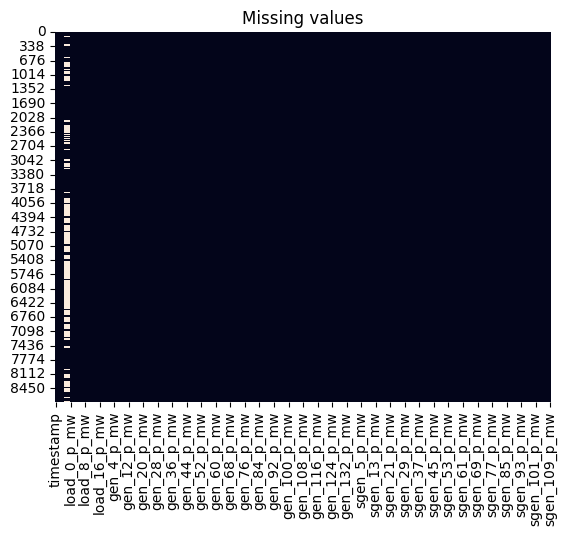

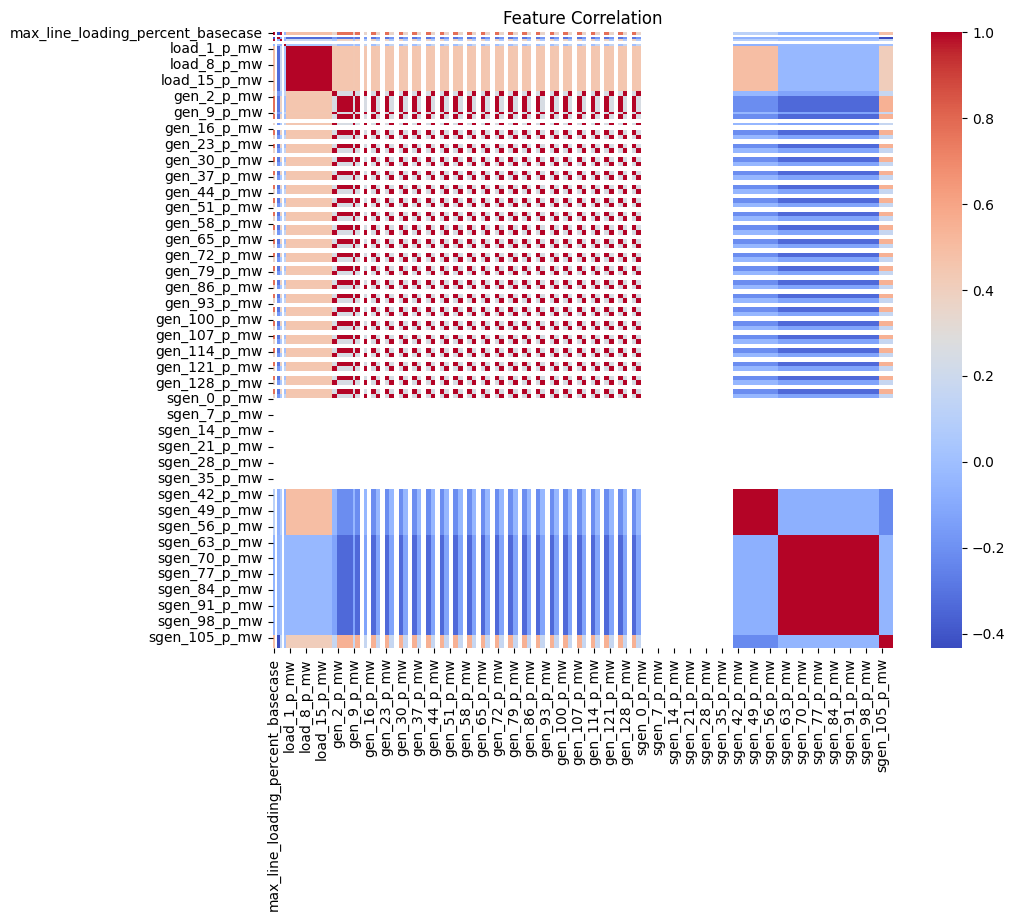

C:\Users\Gasper\AppData\Local\Temp\ipykernel_12660\56704398.py:24: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


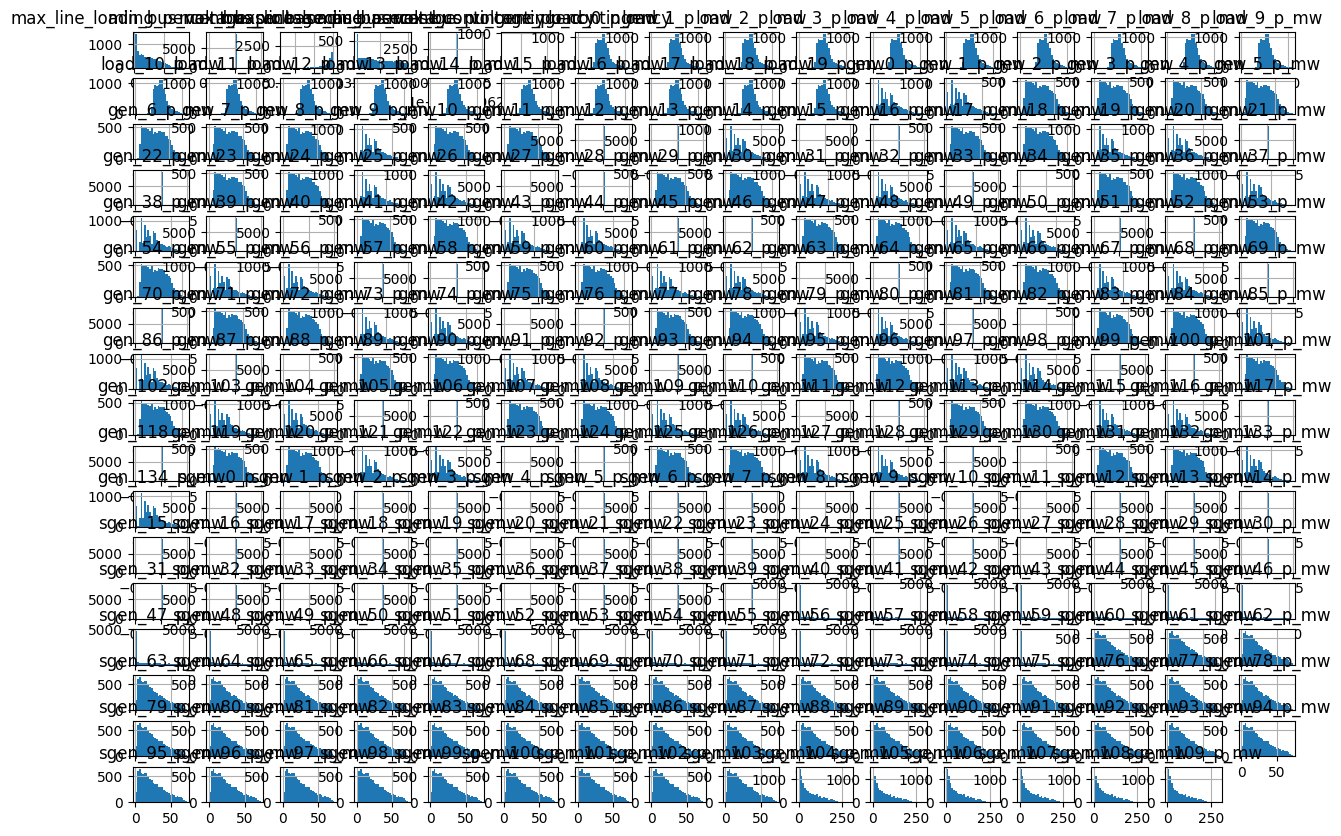

In [5]:
# Osnoven pregled
print(df.shape)
print(df.columns)
print(df.info())
print(df.describe())

# Porazdelitev labelov
print(df['status'].value_counts())

# Vizualizacija manjkajočih vrednosti
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing values")
plt.show()

# Korelacijska matrika
plt.figure(figsize=(10,8))
# sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
sns.heatmap(df.select_dtypes(include='number').corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

# Histogram vseh feature-jev
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [6]:
print(df['status'].value_counts())

status
secure      4497
insecure    4272
Name: count, dtype: int64


c:\Users\Gasper\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


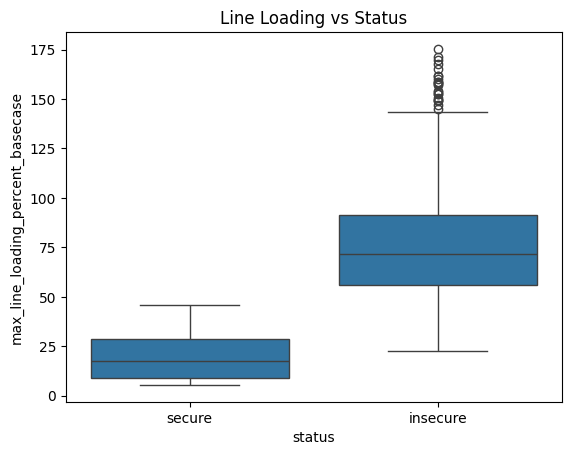

In [7]:
import seaborn as sns

# Primer: primerjamo vrednosti za varno/nevarno stanje glede na neko metrik
sns.boxplot(x='status', y='max_line_loading_percent_basecase', data=df)
plt.title('Line Loading vs Status')
plt.show()